# Week 1: The big picture


In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Look at the big picture

1. Frame the problem
2. Select a performance measure
3. List and check the assumptions

## Step 2: Get the data

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url,sep = ';')



In [3]:
data.head()#returns First five rows of the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#generate feature list(cotains name of all the attributes)
feature_list = data.columns[:-1].values #returns values of first element of each column ,if value is not used then column labels are returned

label = [data.columns[-1]]
print('Feature list',feature_list)
print('Label',label)

Feature list ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label ['quality']


In [8]:
data.info() #gives a quick description of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Visualizing the distribution of quality

Text(0, 0.5, 'Count')

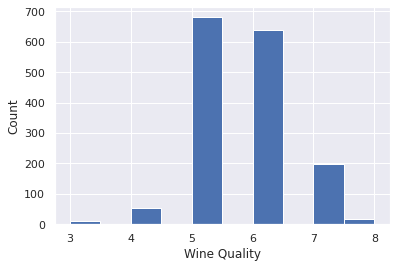

In [17]:
sns.set() #Is used to change the plot format settings and getting visually appealing graphs
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

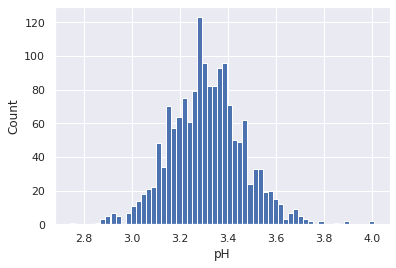

In [34]:

plt.hist(data.pH, bins=60)
plt.xlabel('pH')
plt.ylabel('Count')

## Step 2.2 :Create test set and training set

1.Manual Sampling

In [38]:
#Manual method
def split_train_test(data,test_ratio):
  #set the random seed , to get same test set for multiple runs
  np.random.seed(42)
  
  #shuffle the set
  shuffled_indices = np.random.permutation(len(data))
  
  #calculate the size of the test set
  test_set_size = int(len(data) * test_ratio)

  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

print(split_train_test(data,0.1))


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7              0.67         0.22            2.70      0.107   
682             8.5              0.46         0.31            2.25      0.078   
1326            6.7              0.46         0.24            1.70      0.077   
...             ...               ...          ...             ...        ...   
380             8.3              0.26         0.42            2.00      0.080   
1522            6.1              0.32         0.25            2.30      0.071   
297             7.1              0.63         0.06            2.00      0.083   
405             8.7              0.31         0.46            1.40      0.059   
1378            7.2              0.45         0.15            2.00      0.078   

      free sulfur dioxide  

2. Random sampling using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

3. Stratified sampling
Random sampling - by its nature - introduces biases in such data sets.
This causes a problem while random sampling. The test distribution may not match
with the overall distribution.

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality"]):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]


Now lets compare the distribution of Stratified test set and overall data set

In [41]:
strat_dist = strat_test_set['quality'].value_counts()/len(strat_test_set)
overall_dist = data['quality'].value_counts()/len(data)

In [44]:
#create comparison table using pandas
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [45]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500
